In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the uncleaned the data, later on when the cleaned datasets are done, change to unclean the data sets
train_data= pd.read_csv('../data/processed/train_cleaned.csv')

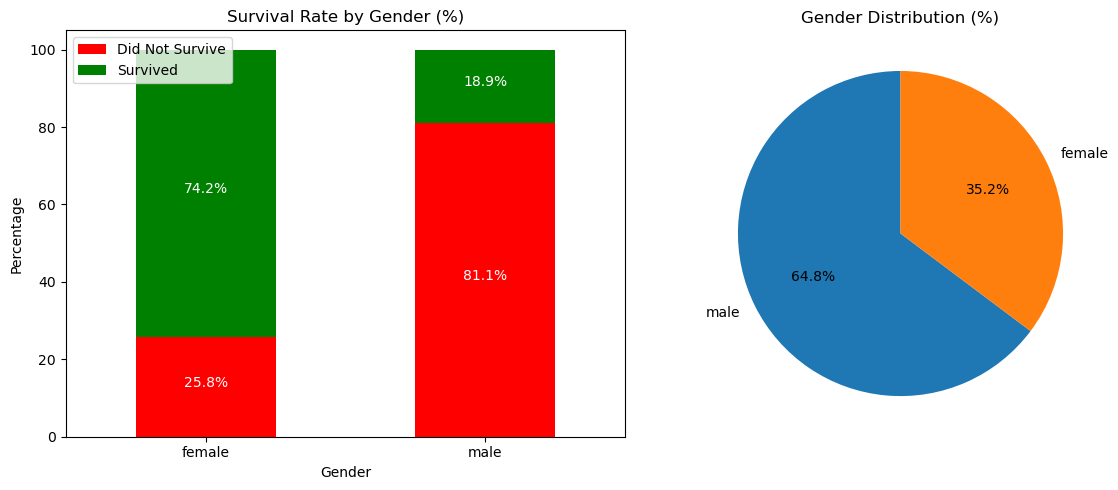

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Calculate percentages
gender_sex = train_data['Sex'].map({0: 'male', 1: 'female'})

sex_survival_pct = pd.crosstab(
    #train_data['Sex'],
    gender_sex,
    train_data['Survived'],
    normalize='index'
) * 100

# Rename columns for clarity
sex_survival_pct.columns = ['Did Not Survive', 'Survived']

sex_survival_pct.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    color = ['red','green']
)

axes[0].set_title("Survival Rate by Gender (%)")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Gender")
axes[0].tick_params(axis='x', labelrotation=0)


# Add percentage labels inside bars
for i, sex in enumerate(sex_survival_pct.index):
    no_survive = sex_survival_pct.loc[sex, 'Did Not Survive']
    survive = sex_survival_pct.loc[sex, 'Survived']
    
    axes[0].text(i, no_survive/2, f"{no_survive:.1f}%", ha='center', color='white')
    axes[0].text(i, no_survive + survive/2, f"{survive:.1f}%", ha='center', color='white')

# Plot 2: Percentage of Male vs Female
#gender_pct = train_data['Sex'].value_counts(normalize=True) * 100
gender_pct = train_data['Sex'].map({0: 'male', 1: 'female'}).value_counts(normalize=True) * 100

axes[1].pie(
    gender_pct,
    labels=gender_pct.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Gender Distribution (%)")

plt.tight_layout()


In [4]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Calculate survival percentages by Pclass
pclass_survival_pct = pd.crosstab(
    train_data['Pclass'],
    train_data['Survived'],
    normalize='index'
) * 100

# Rename columns for clarity
pclass_survival_pct.columns = ['Did Not Survive', 'Survived']

# Plot stacked bar chart with colors
pclass_survival_pct.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    color=['red', 'green']
)

# Titles and labels
axes[0].set_title("Survival Rate by Passenger Class (%)")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Passenger Class")
axes[0].tick_params(axis='x', labelrotation=0)


# Add percentage labels inside bars
for i, pclass in enumerate(pclass_survival_pct.index):
    no_survive = pclass_survival_pct.loc[pclass, 'Did Not Survive']
    survive = pclass_survival_pct.loc[pclass, 'Survived']
    
    axes[0].text(i, no_survive/2, f"{no_survive:.1f}%", ha='center', color='white', fontweight='bold')
    axes[0].text(i, no_survive + survive/2, f"{survive:.1f}%", ha='center', color='white', fontweight='bold')


# Plot 2: Pclass distribution pie chart
class_counts = train_data['Pclass'].value_counts().sort_index()

axes[1].pie(
    class_counts,
    labels=['1st Class', '2nd Class', '3rd Class'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Passenger Class Distribution (%)")

plt.tight_layout()
plt.show()

### Data Visualisation 3
### To visualise the percentage of survivors against the total in different Titles

### Plotting the percentage of survivors against the total in each Title as a bar chart

In [ ]:
# Total and survived counts
total_counts = train_data["Title"].value_counts().sort_index()
survived_counts = train_data.groupby("Title")["Survived"].sum().sort_index()

# Percentages
survived_percent = (survived_counts / total_counts) * 100
not_survived_percent = 100 - survived_percent

plt.figure(figsize=(8, 5))

# Did not survive (red)
bars_not_survived = plt.bar(
    total_counts.index,
    not_survived_percent,
    label="Did Not Survive",
    color="red",
    alpha=0.6
)

# Survived (green) stacked on top
bars_survived = plt.bar(
    total_counts.index,
    survived_percent,
    bottom=not_survived_percent,
    label="Survived",
    color="green"
)

# Add percentage labels (FIXED)
for i, title in enumerate(total_counts.index):
    # Did not survive %
    plt.text(
        i,
        not_survived_percent.iloc[i] / 2,
        f"{not_survived_percent.iloc[i]:.1f}%",
        ha="center",
        va="center",
        color="white",
        fontsize=9
    )

    # Survived %
    plt.text(
        i,
        not_survived_percent.iloc[i] + survived_percent.iloc[i] / 2,
        f"{survived_percent.iloc[i]:.1f}%",
        ha="center",
        va="center",
        color="white",
        fontsize=9
    )

plt.ylabel("Percentage (%)")
plt.xlabel("Title")
plt.title("Survival Percentage by Title")
plt.ylim(0, 100)
plt.legend()
plt.show()
